In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

## Part 1: Linear Regression with one variable

Simple linear Regression assumes a linear relationship between the input varaiable (X) and a single output variable (Y). The output variable can be calculated from a linear combination of the input variable X. 

In this part you will implement simple linear regression to predict the chance of admission of a student into post-graduate school given their CGPA in their undergraduate program. You might end up calculating your chance in your senior year, so make sure to build an accurate model :P

We will begin first by loading the dataset into our notebook visualizing the data points. The first column (your inputs) is CGPA. This CGPA is a little different in that it is out of 10 instead of 4. The second column (your labels) is the chance of getting an admission (Probability between 0-1).


Text(0.5, 1.0, 'CGPA against Chance of Admission')

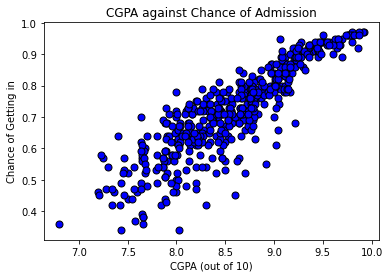

In [4]:
# Importing the dataset.
data = np.loadtxt(os.path.join("Data","ex1data.txt") , delimiter=",")
X,Y = data[:,0], data[:,1]

# Plotting the dataset.
plt.plot(X,Y,"bo",ms=7,mec="k")
plt.ylabel("Chance of Getting in")
plt.xlabel("CGPA (out of 10)")
plt.title("CGPA against Chance of Admission")

### Learn the parameters
In this part, you will fit the linear regression parameters $\theta_0$ and $\theta_1$ to the admission dataset.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\hat {y}^{(i)} - y^{(i)}\right)^2$$ 

where the hypothesis $\hat {y}^{(i)}$ is the predicted value for a given x and is given by the linear model and $m$ is the total number of datapoints
$$ \hat {y} =  h_\theta(x) = \theta_0 + \theta_1 x$$ 

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)x^{(i)}$$

With each step of gradient descent, your parameters $\theta_0$ and $\theta_1$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [5]:
def h_x(x,theta0,theta1):
    return (theta0 + x*theta1)

def cost_func(X,Y,theta0,theta1):
    m = len(X)
    sum = 0
    for i in range(m):
        predicted_y = h_x(X[i],theta0,theta1)
        actual_y = Y[i]
        distance = predicted_y - actual_y
        sum += distance*distance
    cost = sum/(2*m)
    return cost

def gradient_descent(X,Y,alpha,epochs):
    J = list() # At each iteration/epoch, append your calculated loss in this list
    
    # Initializing the thetas/weights with 1:
    theta0 = 1 
    theta1 = 1
    m = len(X)
    
    for epoch in range(epochs):
        delta_theta0 = 0
        delta_theta1 = 0
        for k in range(m):
            delta_theta0 += (h_x(X[k],theta0,theta1) - Y[k])
            delta_theta1 += X[k]*(h_x(X[k],theta0,theta1) - Y[k])
        theta0 -= alpha*delta_theta0/m
        theta1 -= alpha*delta_theta1/m
        J.append(cost_func(X,Y,theta0,theta1))
    
    return theta0 , theta1 , J

In [6]:
n_epoch = 25000 # Modify as per your model (should be in the range of 1000 - 3000)
alpha = 0.01 # Modify as per your model (should be in the range of 0.001 - 0.1)

theta0, theta1, J = gradient_descent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))

Predicted theta0 = -0.4747, theta1 = 0.1398, cost = 0.0030


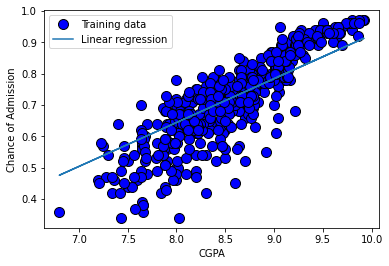

In [7]:
y_pred_list = list()
for x in X:
    y_pred_list.append(h_x(x, theta0, theta1))
plt.plot(X, Y, 'bo', ms=10, mec='k')
plt.ylabel('Chance of Admission')
plt.xlabel('CGPA')
plt.plot(X, y_pred_list, '-')
plt.legend(['Training data', 'Linear regression'])

Make a prediction.

Convert your CGPA to a cgpa out of 10. Then using your learned values of theta, predict your chance of getting into a Post-Grad Program.

In [8]:
my_cgpa = 3.424
new_cgpa = my_cgpa*10/4
print("My chances of getting into Post-Grad are {}".format(h_x(new_cgpa,theta0,theta1)))

My chances of getting into Post-Grad are 0.7222173013426185


## Part 2

We will now implement multivarient linear regression using the same dataset with more inputs (X) to predict the same single output (Y).

For this Part we use 5 inputs (GRE Score, TOEFL Score, SOP, LOR and CGPA) to estimate one output variable (Chance of Admit).

In the code segment below, we have read the data from a csv and done some pre-processing. 

In [2]:
data = pd.read_csv('./Data/admissions.csv')
data=data.drop((['Serial No.','University Rating','Research']),axis=1)
data

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
0,337,118,4.5,4.5,9.65,0.92
1,324,107,4.0,4.5,8.87,0.76
2,316,104,3.0,3.5,8.00,0.72
3,322,110,3.5,2.5,8.67,0.80
4,314,103,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...
495,332,108,4.5,4.0,9.02,0.87
496,337,117,5.0,5.0,9.87,0.96
497,330,120,4.5,5.0,9.56,0.93
498,312,103,4.0,5.0,8.43,0.73


----
### Implementation:

- Start by splitting the given pandas dataframe into a test/train split (80/20 split). 
- Convert this data to a numpy array for faster processing.
- Normalize your train_x and test_x.
- Implement Multivariate Linear Regression. 
- Plot the Loss J against Number of Epochs
- Calculate Mean Square Error of your model using the test set and your learned Thetas.

In [16]:
# Split the data into Training and Testing sets And Convert to a Numpy array:

data = data.sample(frac = 1)

Y = data.iloc[:,5]
X = data.iloc[:,:5]

train_x = X.iloc[:400].to_numpy()
train_y = Y.iloc[:400].to_numpy()
test_x = X.iloc[400:].to_numpy()
test_y = Y.iloc[400:].to_numpy()

In [17]:
## Normalize Data

'''
Step 1: Calculate the mean and std of your train set
Step 2: Subtract the mean matrix from your train_x and 
        divide it by the standard deviation
Step 3: Do the same for test_x using the SAME mean and standard deviation 
'''

mean_matrix = train_x.mean(axis=0)
std_matrix = train_x.std(axis=0)
train_x = train_x - mean_matrix
train_x = train_x / std_matrix

test_x = test_x - mean_matrix
test_x = test_x / std_matrix

In [18]:
def h_x_MLR(X,thetas):
    Y = thetas[0] + X[0]*thetas[1] + X[1]*thetas[2] + X[2]*thetas[3] + X[3]*thetas[4]
    return Y

def compute_cost_MLR(X,Y,thetas):
    m = X.shape[0]
    sum = 0
    for i in range(m):
        predicted_y = h_x_MLR(X[i],thetas)
        actual_y = Y[i]
        distance = predicted_y - actual_y
        sum += distance*distance
    cost = sum/(2*m)
    return cost

def gradient_descent_MLR(X,Y,alpha,epochs):
    J = list() # At each iteration/epoch, append your calculated loss in this list
    
    # Initializing the thetas/weights with 1:
    thetas = [1,1,1,1,1,1]
    m = X.shape[0]
    
    for epoch in range(epochs):
        delta_theta0 = 0
        delta_theta1 = 0
        delta_theta2 = 0
        delta_theta3 = 0
        delta_theta4 = 0
        for k in range(m):
            delta_theta0 += (h_x_MLR(X[k],thetas) - Y[k])
            delta_theta1 += X[k,0]*(h_x_MLR(X[k],thetas) - Y[k])
            delta_theta2 += X[k,1]*(h_x_MLR(X[k],thetas) - Y[k])
            delta_theta3 += X[k,2]*(h_x_MLR(X[k],thetas) - Y[k])
            delta_theta4 += X[k,3]*(h_x_MLR(X[k],thetas) - Y[k])
        thetas[0] -= alpha*delta_theta0/m
        thetas[1] -= alpha*delta_theta1/m
        thetas[2] -= alpha*delta_theta2/m
        thetas[3] -= alpha*delta_theta3/m
        thetas[4] -= alpha*delta_theta4/m
        J.append(compute_cost_MLR(X,Y,thetas))
    
    return thetas, J

[0.718600000000023, 0.05493222096314875, 0.039076368544179466, 0.018360657076143358, 0.029000293962725653, 1]


Text(0.5, 0, 'Epoch number')

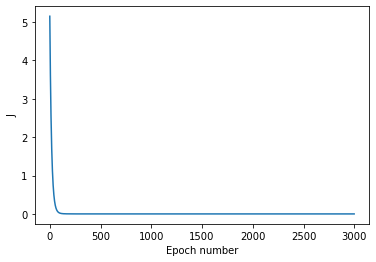

In [19]:
# Return J for every epoch and Plot it against # of epochs.
n_epoch = 3000 
alpha = 0.01 
thetas, J = gradient_descent_MLR(train_x,train_y,alpha,n_epoch)
print(thetas)
plt.plot(J,"-")
plt.ylabel('J')
plt.xlabel('Epoch number')

In [20]:
from sklearn.metrics import mean_squared_error

y_predicted = []
for i in range(test_x.shape[0]):
    y_predicted.append(h_x_MLR(test_x[i],thetas))
    
mean_squared_error(test_y,y_predicted)

0.005105757763620351